In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset and libraries

In [2]:
avalanche_data=pd.read_csv(r'C:\Users\prem\Downloads\Avalanche.csv')
avalanche_data.sample(5)

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
32,52,M,8,3,7,1
52,35,H,21,8,26,0
89,12,H,29,12,15,0
101,15,H,30,7,19,0
43,74,M,27,-25,33,2


In [4]:
avalanche_data.shape

(204, 6)

# Handle Missing Data

In [14]:
avalanche_data.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

- Theres no missing data no we dont need to handle them using traditional mean,median and mode methods

In [15]:
avalanche_data.corr()

,Slope,Snow Density,Air Temperature,Wind,Prediction
Slope,1.000000,0.066079,0.065655,-0.043279,0.487693
Snow Density,0.066079,1.000000,-0.046312,0.066345,0.454154
Air Temperature,0.065655,-0.046312,1.000000,0.077987,-0.200510
Wind,-0.043279,0.066345,0.077987,1.000000,-0.014613
Prediction,0.487693,0.454154,-0.200510,-0.014613,1.000000


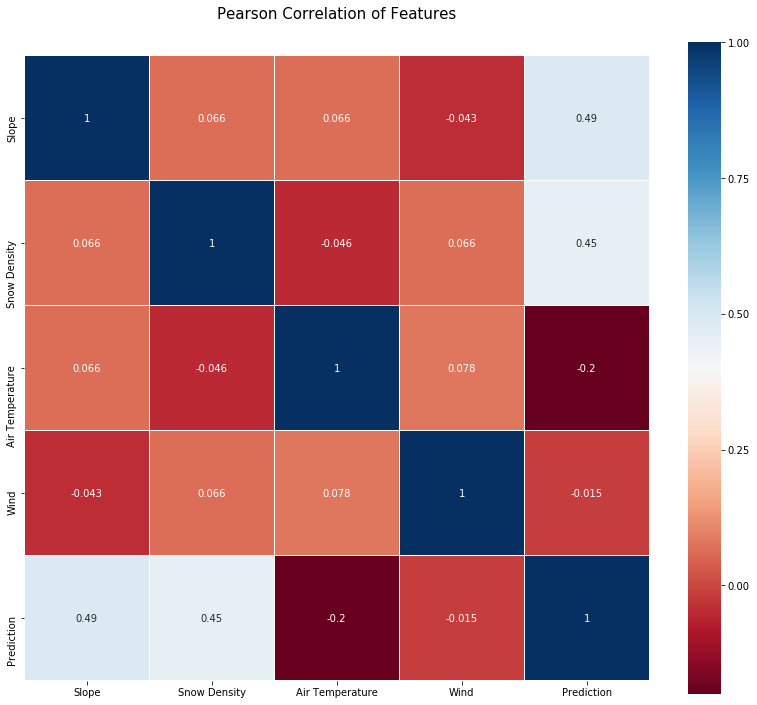

In [17]:
import seaborn as sns
cols = ['Slope','Snow Density','Air Temperature','Wind','Prediction']
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(avalanche_data[cols].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

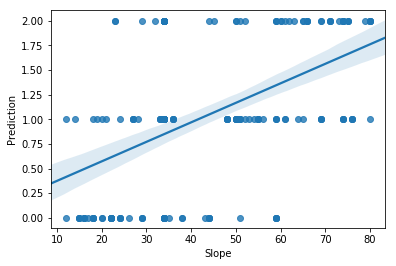

In [18]:
sns.regplot(x=avalanche_data['Slope'],y=avalanche_data['Prediction'])

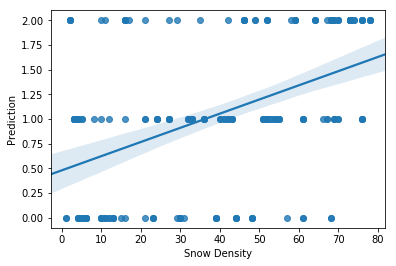

In [19]:
sns.regplot(x=avalanche_data['Snow Density'],y=avalanche_data['Prediction'])

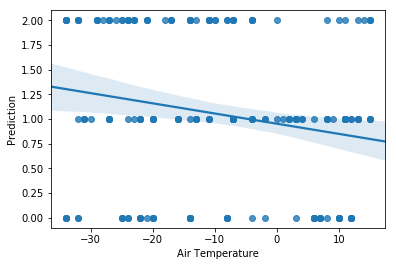

In [20]:
sns.regplot(x=avalanche_data['Air Temperature'],y=avalanche_data['Prediction'])

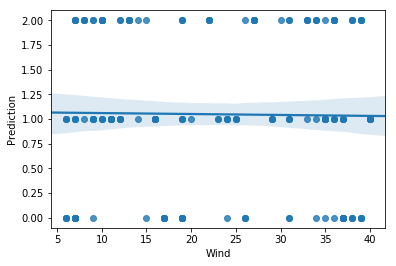

In [21]:
sns.regplot(x=avalanche_data['Wind'],y=avalanche_data['Prediction'])

# insight

- if slope increases then the chance of avalanche is high
- if density of snow increases then also the chance of avalanche is high 
- Smaller the temprature or colder the temprature higher chance of avalanche
- Wind speed has significantly less effect on avalache

# check for Outliers

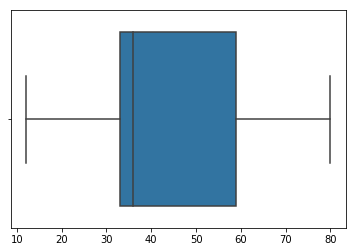

In [22]:
sns.boxplot([avalanche_data['Slope']])

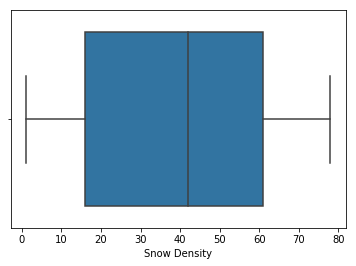

In [23]:
sns.boxplot(avalanche_data['Snow Density'])

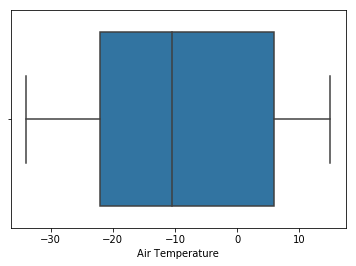

In [24]:
sns.boxplot(avalanche_data['Air Temperature'])

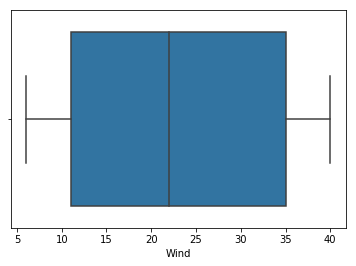

In [25]:
sns.boxplot(avalanche_data['Wind'])

### insight -> No Outliers

# Encoding categorical values and Feature Selection and Scaling

In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [28]:
avalanche_data['Forest Density']=lb.fit_transform(avalanche_data['Forest Density'])

In [35]:
avalanche_data.head(10)

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,0,52,-17,19,2
1,24,1,23,-8,19,0
2,15,0,30,7,19,0
3,27,1,61,-13,25,1
4,34,0,4,-20,7,0
5,34,1,76,-7,40,1
6,34,2,73,-32,27,2
7,34,1,4,3,9,1
8,34,2,44,6,6,0
9,34,1,73,-34,13,2


H=0
l=1
M=2

In [36]:
#lets normalize our features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
# Splitting the Data into independent and dependent features
x=avalanche_data.iloc[:,:5].values
y=avalanche_data.iloc[:,-1].values
x

array([[ 59,   0,  52, -17,  19],
       [ 24,   1,  23,  -8,  19],
       [ 15,   0,  30,   7,  19],
       ...,
       [ 34,   2,  33,  13,  35],
       [ 34,   1,  51,  -4,  35],
       [ 34,   2,  59, -29,   8]], dtype=int64)

In [46]:
x=sc.fit_transform(x)

C:\Users\prem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [145]:
from joblib import dump
dump(sc,'avstandard.save')

['avstandard.save']

In [47]:
x

array([[ 0.78825393, -1.28758635,  0.50956317, -0.51451244, -0.28945657],
       [-1.05401548, -0.02476128, -0.67774511,  0.08602465, -0.28945657],
       [-1.5277419 , -1.28758635, -0.39115346,  1.08691979, -0.28945657],
       ...,
       [-0.52765279,  1.2380638 , -0.26832846,  1.48727784,  1.06799494],
       [-0.52765279, -0.02476128,  0.46862151,  0.35293002,  1.06799494],
       [-0.52765279,  1.2380638 ,  0.79615483, -1.31522855, -1.22270449]])

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [121]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((142, 5), (142,), (62, 5), (62,))

# Model Development and Evaluation

# 1.Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [123]:
lr.fit(x_train,y_train)

C:\Users\prem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
yhat=lr.predict(x_test)

In [125]:
yhat

array([1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2], dtype=int64)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.7096774193548387

# 2. Random Forest Classifier


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [139]:
parameters={
    'n_estimators':[20,50,100,150,200,250,300,270,350],
    'max_depth':[5,7,8,9,10,4],
    'criterion':['entropy','gini']
}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,param_grid=parameters,cv=5)
rf.fit(x_train,y_train)
print('the best value of learning rate is',rf.best_params_,)

the best value of learning rate is {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 150}


In [134]:
rf=RandomForestClassifier(n_estimators=150,max_depth=9,criterion='gini')
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
from joblib import dump
dump(rf,'Avalanche.save')

['Avalanche.save']

In [135]:
yhat=rf.predict(x_test)

In [136]:
yhat

array([1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2], dtype=int64)

In [137]:
accuracy_score(y_test,yhat)

0.8548387096774194

# 3. Decision Tree Classifer

In [138]:
from sklearn.tree import DecisionTreeClassifier
parameters={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20],
    'random_state':[0]
}
dt=DecisionTreeClassifier()
dt=GridSearchCV(dt,param_grid=parameters,cv=5)
dt.fit(x_train,y_train)
print('the best value of learning rate is',dt.best_params_,)

the best value of learning rate is {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}


In [94]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
yhat=dt.predict(x_test)

In [96]:
yhat

array([1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2], dtype=int64)

In [97]:
accuracy_score(y_test,yhat)

0.8548387096774194

# K Nearest Neighbors Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [99]:
parameters={
    'n_neighbors':[5,6,7,10,15,20,30,40,50,45],
    'metric':['minkowski'],
    'p':[1,2]
}
knn=KNeighborsClassifier()
knn=GridSearchCV(knn,param_grid=parameters,cv=5)
knn.fit(x_train,y_train)
print('the best value of learning rate is',knn.best_params_,)

the best value of learning rate is {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}


In [102]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
yhat=knn.predict(x_test)

In [103]:
accuracy_score(y_test,yhat)

0.7580645161290323

# Naive Bayes Classifier

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [106]:
pipe=Pipeline([('Nb',GaussianNB())])

In [107]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('Nb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [108]:
yhat=pipe.predict(x_test)

In [109]:
accuracy_score(y_test,yhat)

0.6612903225806451

# SVM

In [110]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Users\prem\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8387096774193549

In [ ]:
 # Random Forest has best accuracy of 87

In [142]:
rf.predict(sc.transform([[59,0,52,-7,19]]))

array([1], dtype=int64)